# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11594,7779,12144,3252,8035,3029
1,3067,13240,23127,3941,9959,731
2,2126,3289,3281,1535,235,4365


Percentile ranks for the chosen samples


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
100,62.5,78.6,80.2,73.0,91.4,90.5
200,24.3,91.8,94.5,77.7,94.1,41.4
411,17.3,46.4,39.8,50.2,22.5,94.5


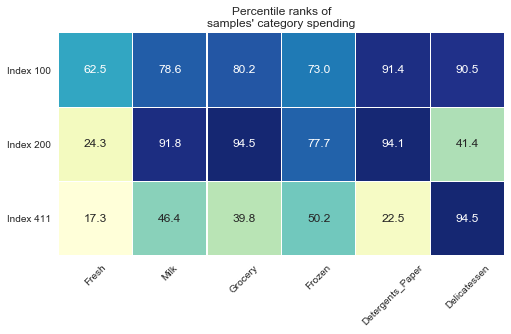

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# TODO: Select three indices of your choice you wish to sample from the dataset
indices=[100, 200, 411]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

# Code to calculate percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
print("Percentile ranks for the chosen samples")
display(pcts)

# Code to display percentiles with heatmap
sns.heatmap(pcts, annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlGnBu', square=True, cbar=False)
plt.yticks([2.5,1.5,.5], ['Index '+str(x) for x in indices], rotation='horizontal')
plt.xticks(rotation=45, ha='center')
plt.title('Percentile ranks of\nsamples\' category spending');

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

If you observe the first sample above, this customer seems to stock up his establishment with products from all the above-mentioned categories. He not only purchases the products such as frozen, dairy, grocery, detergents paper, delicatessen at around 73 percentile and above but also fresh vegetables and fruits in the range of 62.5 percentile. So based on the statistics, it is highly probable that this establishment represents Super market.

In the second sample, the establishment seems to stock up products such as Milk,Grocery and Detergent_paper above 91.8 percentile and product Frozen around 77.7 percentile. This customer also seems to buy the product Fresh, Delicatessen but at a lower percentage i.e. in the range 24-42 percentile. So as per the spending pattern this establishment represents a grocery store/convenience store/ retail shop around some city corner.

The third sample above, the purchases made by them in category Delicatessen is the highest around 94.5 percentile. While all other categories are bought in the range of 17 to 50 percentile.This makes us conclude that the establishment may be a Deli store/bakery/Cafe.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.model_selection import train_test_split
range_target_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

targetdict={}

for target_feature in range_target_features:
    y_target = data[target_feature]
    new_data = data.drop([target_feature], axis = 1, inplace = False)

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, y_target, test_size=0.25, random_state=25)

    # TODO: Create a decision tree regressor and fit it to the training set
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state=25)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    
    targetdict[target_feature] = score
    print("score is {} for {}".format(score, target_feature))

score is -0.8212390829152765 for Fresh
score is 0.04549669868715578 for Milk
score is 0.8107870261517665 for Grocery
score is 0.029117511830653694 for Frozen
score is 0.744682803265913 for Detergents_Paper
score is -2.699792558665553 for Delicatessen


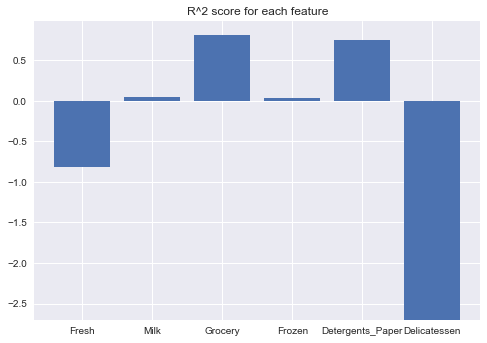

R^2 score metrics


Category,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Score,-0.821239,0.045497,0.810787,0.029118,0.744683,-2.699793


In [5]:
import matplotlib.pyplot as plt

names = list(targetdict.keys())
values = list(targetdict.values())

#Code to depict R^2 scores for all the 6 product categories
plt.bar(range(len(targetdict)),values,tick_label=names)
plt.title('R^2 score for each feature')
plt.savefig('bar.png')
plt.show()

#Code to display R^2 score metrics
dictdata = {'Category': names, 'Score': values}
print("R^2 score metrics")
r2scoredf=(pd.DataFrame.from_dict(dictdata))
display(r2scoredf.set_index('Category').T)

## Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
Since there are only six features, I tried to predict each one of these and found that the feature Grocery had the best R^2 score in the group. From the above statistics it can also be observed that category such as Fresh and Delicatessen has negative scores thus implying that the model fails to fit this data. While the R^2 scores for Milk and Frozen are comparatively less which implies we can use these features for identifying customer spending habits.

Please refer the table above which lists down the coefficient of determination R^2 for each feature /category. The reported prediction score for Grocery is 0.8107 followed by Detergents paper whose score  is 0.7446.

This means that the model was able to predict Grocery / Detergents_Paper’s value reasonably well and could mean that Grocery/ Detergents_Paper are not a necessary feature for identifying customers' spending habits. Since the R^2 scores are comparatively lower for other features such as Milk and Frozen,it implies that these features are very hard to predict using other features and thus are very important. So, we need to consider these features to predict customers' purchasing behaviour with a reasonable degree of accuracy.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

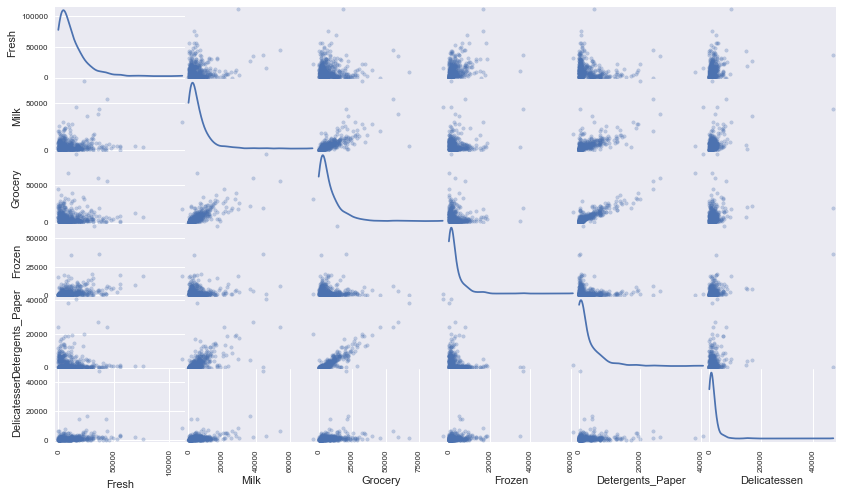

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

Correlation Metrics:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


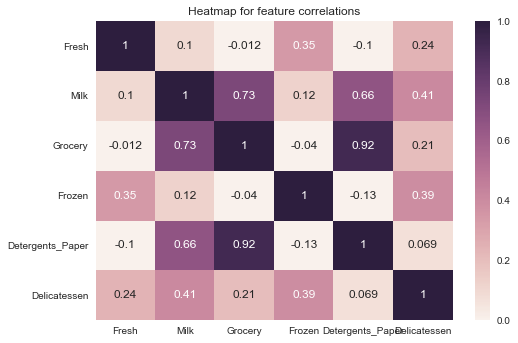

In [7]:
#Code to fetch the feature correlation between different categories
print("Correlation Metrics:")
display(data.corr())

#Code to diplay correlation metrics with heatmap
sns.heatmap(data.corr(), annot=True,vmin=0, vmax=1)
plt.title('Heatmap for feature correlations');

In [8]:
#Code to calculate difference between Mean and Median
datadf = pd.DataFrame()
datadf =  pd.concat([pd.DataFrame(data.mean()).T,pd.DataFrame(data.median()).T], ignore_index=True)
datadf.index = ['Mean','Median']
datadf=datadf.T
datadf['Difference'] = datadf['Mean']-datadf['Median']
datadf['Distribution type'] = ['Positively skewed' if x > 0 else 'Negatively skewed' for x in datadf['Difference']]
print("Classification of each feature into its distribution type")
display(datadf)

Classification of each feature into its distribution type


,Mean,Median,Difference,Distribution type
Fresh,12000.297727,8504.0,3496.297727,Positively skewed
Milk,5796.265909,3627.0,2169.265909,Positively skewed
Grocery,7951.277273,4755.5,3195.777273,Positively skewed
Frozen,3071.931818,1526.0,1545.931818,Positively skewed
Detergents_Paper,2881.493182,816.5,2064.993182,Positively skewed
Delicatessen,1524.870455,965.5,559.370455,Positively skewed


### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**
Using the scatter matrix as reference, we can observe that the distribution is not a normal distribution as majority of the data points seems to cluster near the origin/left side towards the axis and very few on the right. From this we can assume that the distribution may be positively skewed. To confirm our assumption, we need to calculate the difference between the Mean and Median. We can also observe that for some of the features there are lot of outliers (e.g. Fresh, Frozen). If the outliers are non-randomly distributed, they can decrease normality. It can drastically change the results of the data analysis and statistical modelling.

From the above heatmap we observe that Grocery has a very good correlation with Detergents_Paper and relatively lower but a good correlation with Milk also. Similarly, even Detergents_Paper has a good correlation with Milk.

This confirms my suspicion that since Grocery is highly correlated with some of the other features, this feature is not relevant and cannot be used to identify a specific customer. Only those features can be considered as relevant and used to identify a specific customer which do not show any(or very less) correlation with other features

If you check the above metrics, we observe that there is a huge difference between Mean and Median i.e. Mean is greater than Median implying that it is a skewed distribution. We also observe that more points are clustered to the left (closer to the origin) and some points(tail) are extending it to the right. So, we can conclude that these distributions appear to be positively skewed distribution.The shape of the distributions of Detergents_Paper, Grocery, and Milk are all quite similar.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

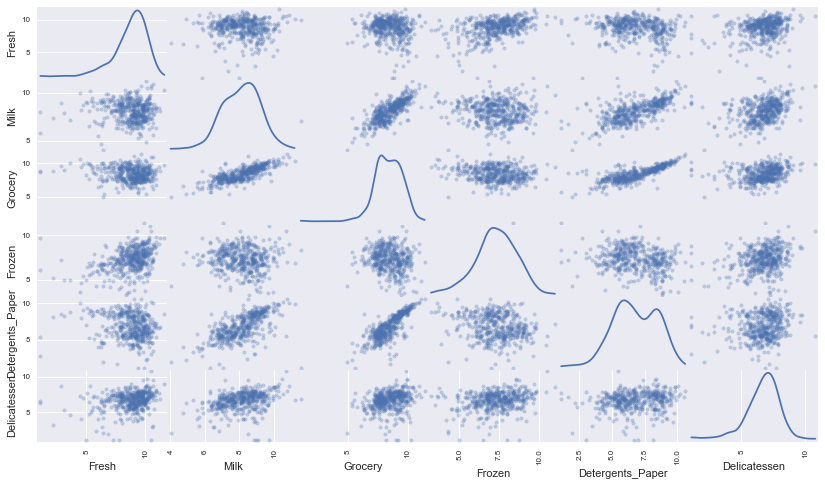

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,7.661998,8.098339,8.095904,7.336286,5.459586,8.381373


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
feature_outliers = {}
def compare_count(index):
    return feature_outliers[index]['count']

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    for outlier in log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index:
        feature_outlier = feature_outliers.get(str(outlier), {'count':0, 'features':[]});
        feature_outlier['count'] += 1
        feature_outlier['features'].append(feature)
        feature_outliers[str(outlier)] = feature_outlier
        
# OPTIONAL: Select the indices for data points you wish to remove
print("List of all the outliers:\n")
outliers = list(feature_outliers.keys())
print(outliers)
outlierdf=pd.DataFrame()

#Code to get the list of outliers for more than two features
outliers.sort(key=compare_count)

for outlier in outliers:
    if feature_outliers[str(outlier)]['count'] > 1:
        temp = pd.DataFrame({'Outlier': outlier, 'Product': feature_outliers[str(outlier)]['features'],'Value': '*'})
        outlierdf = pd.concat([outlierdf, temp], ignore_index=True)
     
outliers = np.array(outliers, np.int32)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


List of all the outliers:

['65', '66', '81', '95', '96', '128', '171', '193', '218', '304', '305', '338', '353', '355', '357', '412', '86', '98', '154', '356', '75', '38', '57', '145', '175', '264', '325', '420', '429', '439', '161', '109', '137', '142', '183', '184', '187', '203', '233', '285', '289', '343']


In [12]:
#Code to diplay list of outliers (for more than 2 features)
print("Outliers list metrics (Multivariate)")
outlierdfmet=outlierdf.pivot(index='Outlier', columns='Product',values='Value').fillna('')
display(outlierdfmet.sort_index())

Outliers list metrics (Multivariate)


Product,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Outlier,,,,,,
128,*,,*,,,
154,*,,,,*,*
65,,,*,*,,
66,*,,*,,,
75,,*,,,*,


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

After applying Tukey’s method for identifying outlier, we have obtained a list of data points which falls beyond outlier step (1.5 times the interquartile range (IQR)) and which are considered abnormal. This list also includes data points of Multivariate type.

From the above metrics we can observe that data points 65,66,75,128 can be considered as outliers for more than 2 features. While data point 154 is an outlier for 3 features (Delicatessen, Grocery and Milk)

An outlier is a data point that is distant from other similar points. It could be due to data processing error, data capturing error, sampling error, measurement error or could be natural outlier. Outliers can drastically change the results of the data analysis and statistical modelling. There are numerous unfavourable impacts of outliers in the data set:
•	It increases the error variance and reduces the power of statistical tests
•	If the outliers are non-randomly distributed, they can decrease normality
•	They can bias or influence estimates that may be of substantive interest

Outliers have adverse effects upon correlations.  Researchers have proved that removal of the outliers had significant effects upon the magnitude of the correlations, and the cleaned correlations were more accurate. It shows significant changes in statistics as a function of removal of outliers, and in the overwhelming majority of analyses accuracy of estimates were enhanced.  This makes us conclude that we need to remove outliers for better results.

In case of k-means algorithm, it updates the cluster centres by taking the average of all the data points that are closer to each cluster centre. When all the points are packed nicely together, the average makes sense. However, when there are outliers, this can affect the average calculation of the whole cluster. As a result, this will push the cluster centre closer to the outlier.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.1280,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.6300,-0.0376,0.4634
Dimension 3,0.1049,-0.7452,0.1544,-0.0204,0.2670,-0.2349,0.5422
Dimension 4,0.0978,0.2667,0.1375,0.0710,-0.7133,-0.3157,0.5445
Dimension 5,0.0488,0.0114,0.7083,0.3168,0.0671,-0.4729,-0.4120
Dimension 6,0.0233,-0.0543,-0.5177,0.8267,0.0471,-0.2080,-0.0094


PCA dimensions 1&2 cumulative sums:  0.7252
PCA dimensions 1,2,3&4 cumulative sums:  0.9279


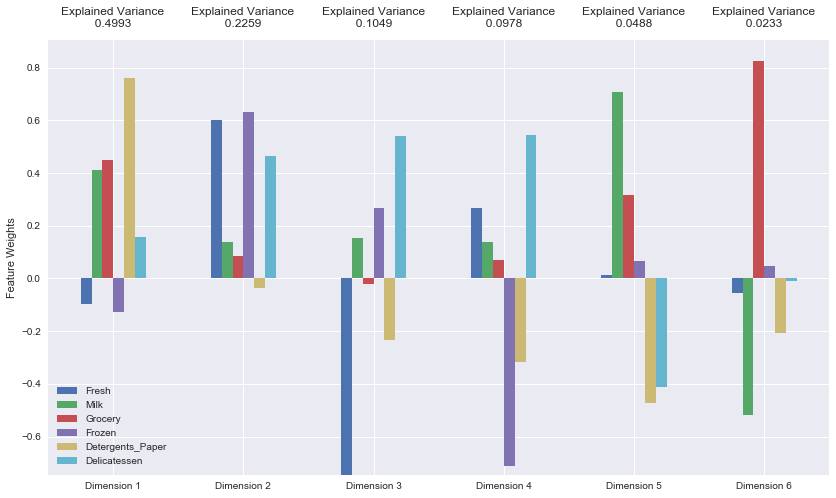

In [13]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

display(pca_results)
# Print cumulative sums of the variances explained by the PCA as suggested by reviewer.
print("PCA dimensions 1&2 cumulative sums: ", pca_results['Explained Variance'].cumsum()[1])
print("PCA dimensions 1,2,3&4 cumulative sums: ", pca_results['Explained Variance'].cumsum()[3])

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
The total variance in the data as explained by the first and second principal components is about 72.52%. After the addition of the third and fourth principal components, the total variance increases to about 92.79%. By analysing the above graph, we can study more about the features which are actually driving the patterns. More variance of data along a principal component, higher that principal component is ranked.

From the above graph we observe that in the first principal component the variance is around 49.33%. This implies that the current component (composite set of features) shows the largest variance relative to all the data points. So it holds the most information when compared to other less important components. It represents a pattern where spending is more on product such as Detergent_Paper, Milk ,Grocery and a bit on product Delicatessen. While the graph also points out that products like Fresh and Frozen shows a negative loading for this principal component. By observing the current customer spending pattern, the establishment might most likely be grocery store/convenience store. 

The second principal component represent the second most variance that was obtained by PCA.The graph depicts the second highest variance of about 22.59%, denotes a group which spends on products such as Fresh, Frozen and Delicatessen. The spending on other products like Milk, Grocery are relatively very low and for product Detergent_Paper it displays a low negative loading. 
After analysing the spending pattern, we can predict that the establishment might represent super market.

The third principal component represents a group with 10.49% variance, in which the major spending is done in products such as Delicatessen, Frozen and Milk. Here product Fresh shows a very high negative variance while other products like Grocery and Detergents_Paper shows relatively low negative loading. Depending upon the spending pattern the establishment seems to be a Deli retail shop.

The fourth principal component which adds up 9.78% to the total variance, represents a group where spending on products like Delicatessen,Fresh,Milk and Grocery is high. While products like Frozen and Detergents_Paper shows a negative loading. By observing the spending pattern the establishments seems to be a café/bakery/takeaway joint.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [14]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.5291,1.3485,0.1094,-0.2050,-0.5879,-0.0808
1,3.0820,0.1314,0.3994,-1.4197,0.4747,0.2263
2,-0.7782,-0.0707,2.0944,0.9808,-0.1622,0.0712


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

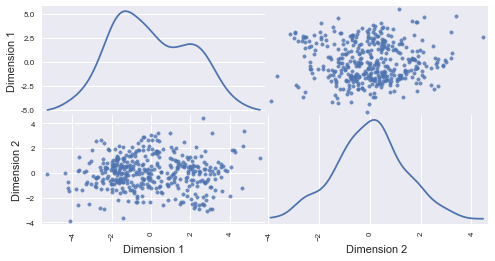

In [15]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# Produce a scatter matrix for each pair of newly-transformed features as suggested by reviewer
pd.scatter_matrix(reduced_data, alpha = 0.8, figsize = (8,4), diagonal = 'kde');


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [16]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.5291,1.3485
1,3.0820,0.1314
2,-0.7782,-0.0707


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

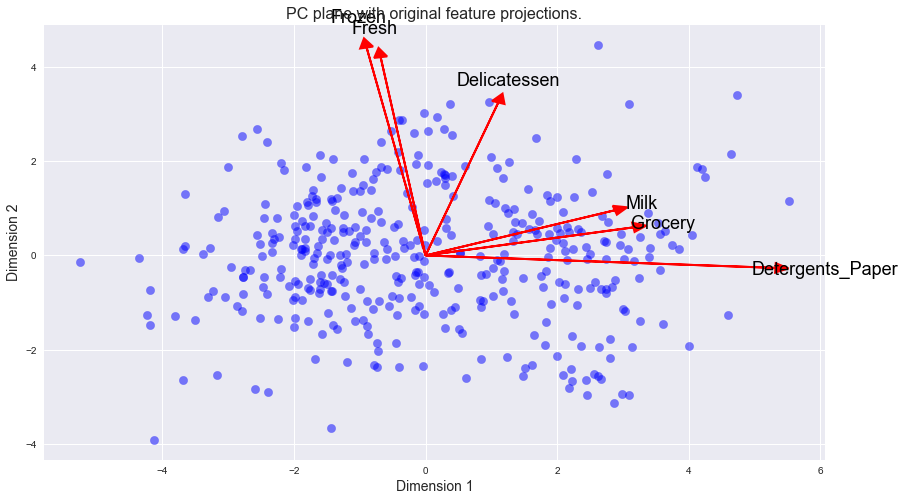

In [17]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
    
K-Means Clustering:

Centroid models are iterative clustering algorithms in which the notion of similarity is derived by the closeness of a data point to the centroid of the clusters. K-Means clustering algorithm is a popular algorithm that falls into this category. In these models, the no. of clusters required at the end have to be mentioned beforehand, which makes it important to have prior knowledge of the dataset. These models run iteratively to find the local optima.

Advantages:
•	Ease of implementation and high-speed performance
•	Measurable and efficient in large data collection
•	An instance can change cluster (move to another cluster) when the centroids are recomputed

Gaussian mixture model: 

This clustering model is based on the notion of how probable is it that all data points in the cluster belong to the same distribution. The aim of mixture models is to structure dataset into several clusters. A popular example of these models is Expectation-maximization algorithm which uses multivariate normal distributions.

Advantages:
•	This model is very flexible and does not assume clusters to be of any geometry. Works well with non-linear geometric distributions as well.
•	Does not bias the cluster sizes to have specific structures as does by K-Means (Circular).
•	It is a probabilistic method for obtaining a fuzzy classification of the observations. The probability of belonging to each cluster is calculated and a classification is usually achieved by assigning each observation to the most likely cluster. 
•	These probabilities can also be used to interpret suspected classifications.

If you observe the above graph, we see a strong correlation between set of features (e.g Group 1:”Milk-Grocery-Detergent_Paper”,Group 2:”Frozen-Fresh” etc. We can also observe that the datapoints are densely packed and there does not seem to be any clear demarcation between these datapoints i.e. there is lot of overlap. So just by checking this graph we cannot confidently predict the number of segments or clusters. 

KMeans algorithm expects us to provide it with number of clusters beforehand. While Gaussian mixture model does not have any such prerequisite criteria. Also GMM clustering is more flexible since it uses soft clustering method. Soft clustering methods assign a score to a data point for each cluster. The value of the score indicates the association strength of the data point to the cluster. As opposed to hard clustering methods, soft clustering methods are flexible in that they can assign a data point to more than one cluster. So the score is the posterior probability.

For the current problem definition, considering all the advantages that the Gaussian mixture model provides us,it seems to be the best solution. We can use it to not only identify various customer segments hidden in the customer data but also fit all the data points in their respective segments.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

For k = 2 score is 0.446753526944537


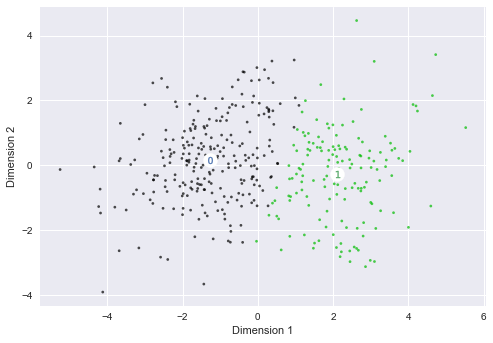

For k = 3 score is 0.3594796703743502


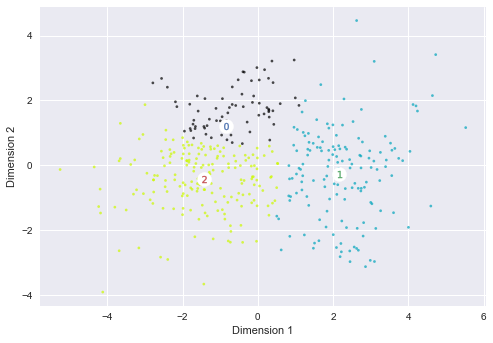

For k = 4 score is 0.3070283472612148


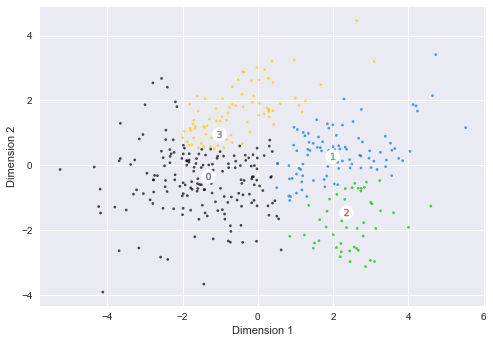

For k = 5 score is 0.32273912022931267


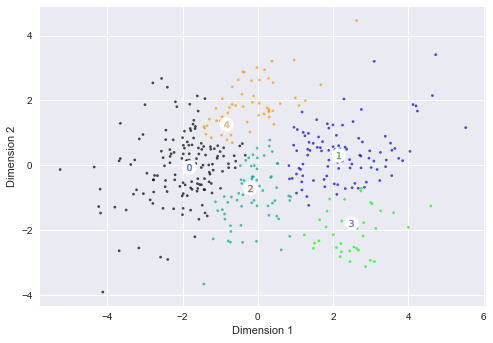

For k = 6 score is 0.3217504594585545


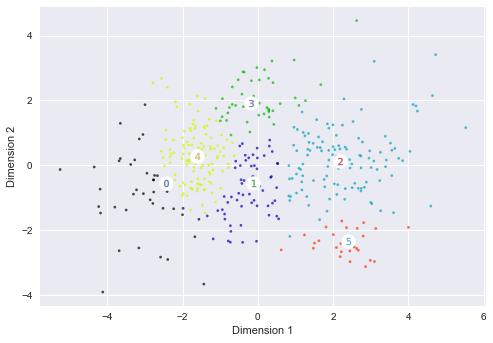

For k = 7 score is 0.300169601562194


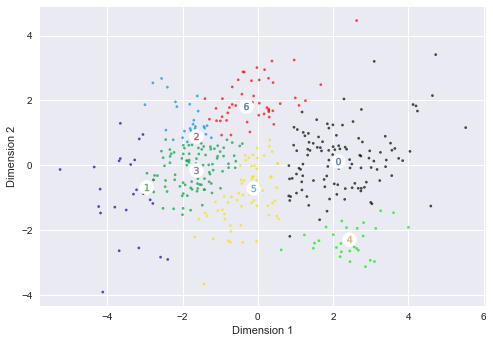

For k = 8 score is 0.32241597074756484


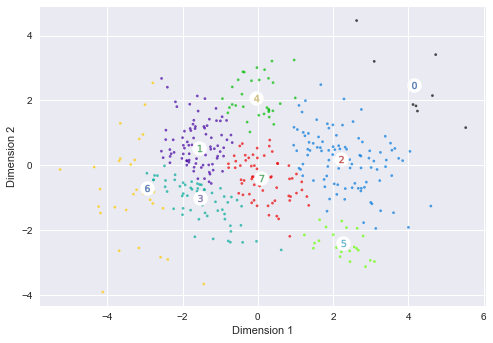

For k = 9 score is 0.3494738227914429


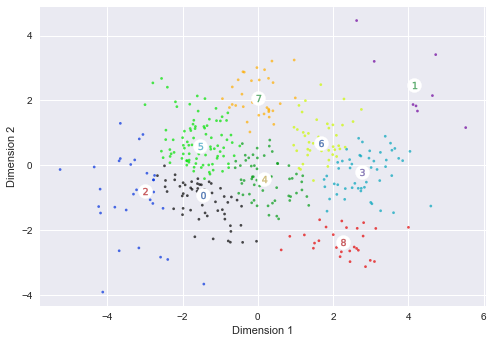

In [18]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
#from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

clusterscoredict={}

for i in range(2, 10):
    clusterer = GaussianMixture(i).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print("For k = {0} score is {1}".format(i, score))
   
    clusterscoredict[i] = score
    
    # Code to display plot showing the actual clusters formed
    colors = cm.spectral(preds.astype(float) / i )
    plt.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Draw white circles at cluster centers
    plt.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for j, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker='$%d$' % j, alpha=1, s=50)

    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")

    plt.show()
    
    clusterer = None
    
#Code to display cluster with the best Silhouette score
clusterer = GaussianMixture(2).fit(reduced_data)
sample_preds = clusterer.predict(pca_samples)
centers = clusterer.means_

preds = clusterer.predict(reduced_data)

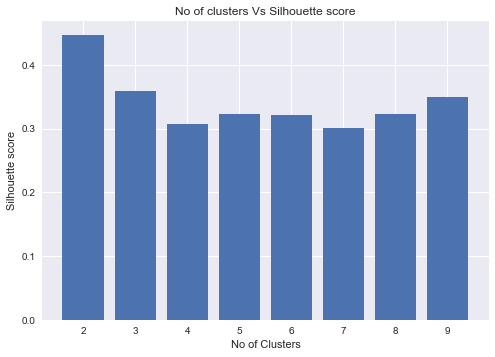

Silhouette score metrics


No of Clusters,2,3,4,5,6,7,8,9
Silhouette score,0.446754,0.35948,0.307028,0.322739,0.32175,0.30017,0.322416,0.349474


In [19]:
names = list(clusterscoredict.keys())
values = list(clusterscoredict.values())

#Code to display a plot depicting No of clusters Vs Silhouette score
plt.bar(range(len(clusterscoredict)),values,tick_label=names)
plt.title('No of clusters Vs Silhouette score')
plt.xlabel("No of Clusters")
plt.ylabel("Silhouette score")
plt.savefig('bar.png')
plt.show()

#Code to display Silhouette score metrics as table
clustdictdata = {'No of Clusters': names, 'Silhouette score': values}
print("Silhouette score metrics")
clustscoredf=(pd.DataFrame.from_dict(clustdictdata))
display(clustscoredf.set_index('No of Clusters').T)

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

Silhouette score was calculated for the range of clusters (2 to 9). Please refer the above metrics table which summarizes the scores that were obtained for various number of clusters. The same has been depicted in the form of a graph too.

As per the above observation, we can conclude that the best silhouette score(0.446754) was obtained when the number of clusters  were set to 2.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

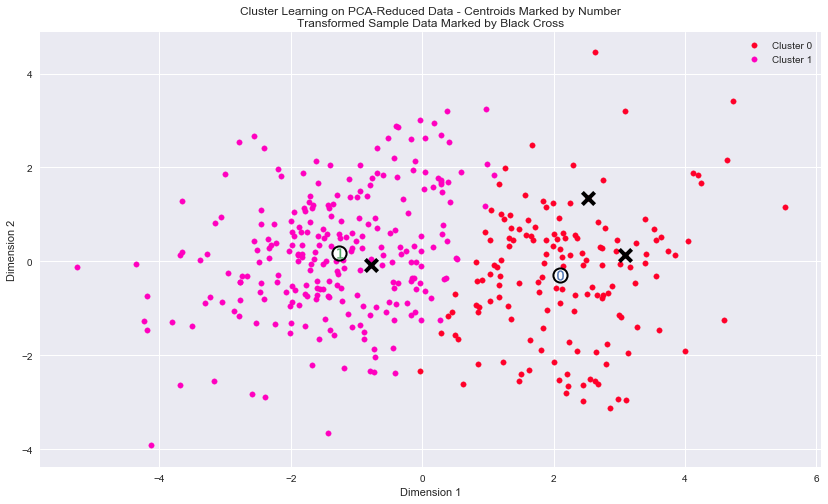

In [20]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [21]:
# TODO: Inverse transform the centers
log_centers =pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

# Display a description of the good dataset
print("\nGood Dataset Statistics with outliers removed.")
display(np.exp(good_data).describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5219.0,7671.0,11403.0,1079.0,4413.0,1099.0
Segment 1,9494.0,2049.0,2598.0,2203.0,337.0,796.0



Good Dataset Statistics with outliers removed.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.00000
mean,12430.630653,5486.314070,7504.907035,3028.809045,2725.376884,1454.71608
std,12552.698266,6410.878177,9263.803670,3712.563636,4644.023066,1746.45365
min,255.000000,201.000000,223.000000,91.000000,5.000000,46.00000
25%,4043.500000,1597.250000,2125.000000,830.000000,263.250000,448.25000
50%,9108.000000,3611.500000,4573.000000,1729.500000,788.000000,997.50000
75%,16969.000000,6802.500000,9762.250000,3745.000000,3660.500000,1830.00000
max,112151.000000,54259.000000,92780.000000,35009.000000,40827.000000,16523.00000


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [22]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)  


Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


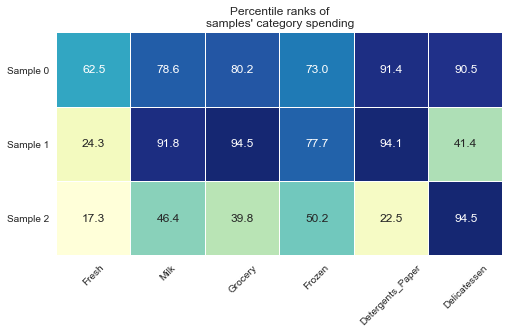

In [23]:
# Code to calculate percentile ranks
pcts = 100. * log_data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
#display(pcts)

# Code to display percentiles with heatmap
sns.heatmap(pcts, annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlGnBu', square=True, cbar=False)
plt.yticks([2.5,1.5,.5], ['Sample '+str(x) for x in range(0,3)], rotation='horizontal')
plt.xticks(rotation=45, ha='center')
plt.title('Percentile ranks of\nsamples\' category spending');

**Answer:**
If observe the sample points 0 and 1 in the above heat map, we find that the percentage of purchases are quite high for Milk,Grocery and Detergent_papers. Also for all the remaining categories the purchases made are quite high when compared to over all data. This establishment is best represented by Segment 0/Cluster 0.

If you check the last sample point 2, we observe that the product Delicatessen is purchased at a high percentile (around 94.5). While remaining categories are purchased at range less than 50 percentile. This establishment is best represented by Segment 1/Cluster 1.

For the above mentioned sample points the predictions made are consistent with the analysis made by us.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
Once the data points have been identified and classified into meaningful customer segments, we are in a better position to predict the expected customer behaviour for the changes wholesale distributor is planning to propose. 

By analysing the above statistics, we can draw a preliminary hypothesis that the proposed changes will surely have different impact on the each of these two customer segments. As per our analysis, Segment 1 represent an establishment which comprises of either restaurant/hotel /café. If we observe their spending pattern, even though the customer purchases less (in terms of percentile of total data) number of products compared to Segment 0,the main criteria for them is that the product needs to “fresh” and they can serve their clients with the best quality food. 

As per the new idea / proposal if the wholesale distributor reduces the delivery service from 5 days to 3 days a week, the customer would have a significant impact. His overhead charges would increase, since he needs to maintain a huge cold storage where he can stock up fruits,vegetables,milk etc. He also needs to take into account that there might be an increase in the amount of spoils (unfit to use) for products that are quickly perishable in nature. Further this may also impact his quality of food due to which his business might suffer losses. 

While if you observe the spending pattern of Segment 0, there might not be any considerable impact since super markets/retail house usually have large storage spaces/freezers. So there is no question of additional overhead charges. 

Even though the above-mentioned points are just a preliminary hypothesis we still need to verify all this by performing A/B test on these customer segments. A/B testing is a way to compare two versions of a single variable, typically by testing a subject's response to variant A against variant B and determining which of the two variants is more effective. So once the results are calculated we can determine which group of customers are affected the most if the proposed change is implemented.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
The above problem definition is a perfect example of classification problem where the model needs to predict whether the customer belongs to Segment 0 or Segment 1.

Firstly, we need to apply Gaussian mixture model clustering algorithm on the basic data and then we can create customer segments. Once we have identified customer segments as Segment 0 and Segment 1, we can use this data as labels for supervised learning. We can use the customer segment data for training, validation and as test data. Once the supervised model is thoroughly trained then we can use the new customers as test data and predict whether each one of them fit in Segment 0 or Segment 1.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

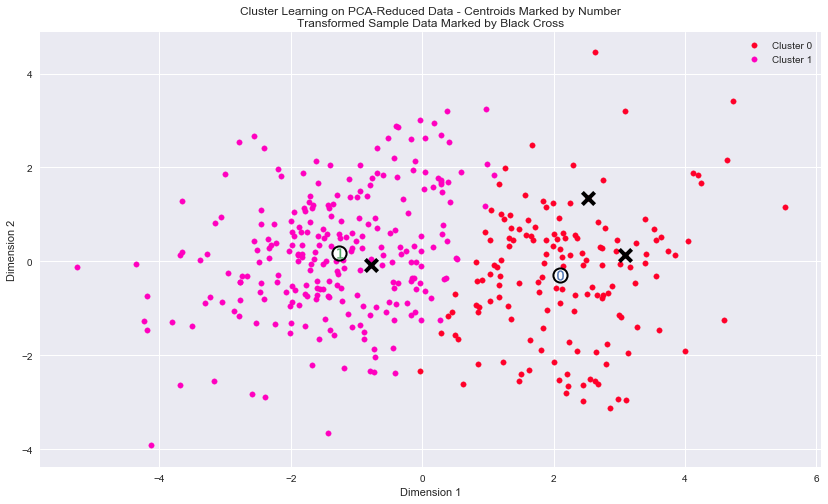

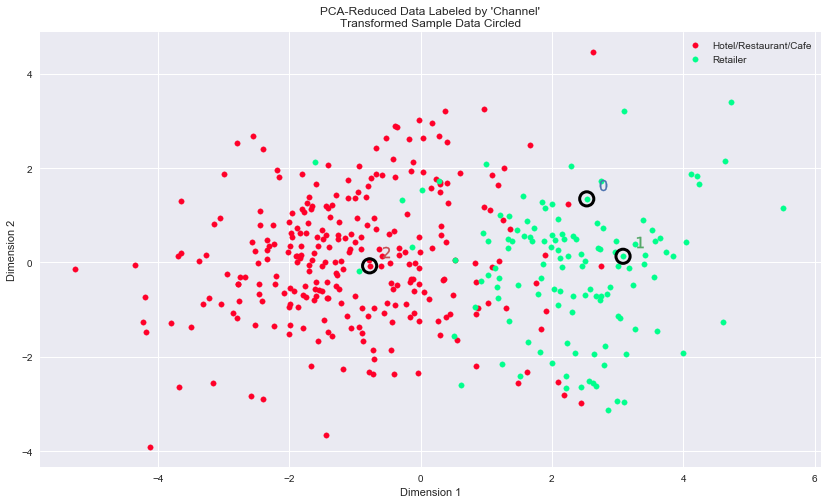

In [24]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
If we compare the plots obtained by applying clustering algorithm /number of clusters and the one obtained by reintroducing the Channel feature, we can make a preliminary conclusion that the algorithm has done a pretty good job in identifying two clusters successfully. Majority of the data points have been correctly predicted i.e. whether it belongs to customer segment – Retailer or hotel/restaurant/cafe.

If we observe the first plot, we find that there is a clear demarcation of data points. All the data points in the left cluster has been classified as hotel/restaurant/café and the cluster on the right has been classified as Retailer. But if we carefully observe the second plot, we can find that there is no clear-cut demarcation and few red datapoints(Hotel/Restaurant/Café) seems to have seeped in the nearby cluster of green points (Retailor). The same observation has been made in case of green data points too. So the customer segments cannot be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution.

Overall if we ignore the overlap of above mentioned datapoints and consider the vast majority of correctly predicted data points, we can conclude that these classifications does seem  consistent with the previous definition of the customer segments.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.